In [1]:
# import all the libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

In [2]:
# dataset downloading

df = pd.read_csv('data/ddproperty_2022-04-19.csv')
df.head()

/var/folders/2b/2150j0xx40g5x7vvsky1pkbw0000gn/T/ipykernel_1238/540867056.py:3: DtypeWarning: Columns (18,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ddproperty_2022-04-19.csv')


,sub_property_type,agent_name,living_space,land_space_raw,price_per_unit,price_max,searched_field,bathroom_number,property_status,search_date,...,longitude,property_street_address,land_space_unit,short_description,property_type_searched,property_url,tenure,parking_number,listing_headline,agent_email
0,For Sale,คุณโบว์ 095-405-8716,280.0,271.2 sqm,฿84623.8938 / sqm,22950000.0,TH1001_2_1.html,NaN,ACT,NaN,...,100.493890,"Ban Phan Thom, Phra Nakhon, Bangkok",sqm,NaN,For_Sale,https://www.ddproperty.com/en/property/bh-0107...,Freehold,NaN,BH_01075 ขาย บ้านเดี่ยว ติด กระทรวงเกษตรและสห...,NaN
1,For Sale,Nakornthong Property,NaN,328 sqm,฿48780.4878 / sqm,16000000.0,TH1001_2_1.html,NaN,ACT,NaN,...,100.502005,"Ban Phan Thom, Phra Nakhon, Bangkok",sqm,NaN,For_Sale,https://www.ddproperty.com/en/property/ที่ดินพ...,NaN,NaN,ที่ดินพร้อมบ้านไม้ ถนนประชาธิปไตย,NaN
2,For Sale,Nakornthong Property,NaN,328 sqm,฿48780.4878 / sqm,16000000.0,TH1001_2_1.html,NaN,ACT,NaN,...,100.501159,"Ban Phan Thom, Phra Nakhon, Bangkok",sqm,NaN,For_Sale,https://www.ddproperty.com/en/property/ที่ดิน-...,Freehold,NaN,ที่ดิน พร้อมบ้านไม้เก่า 2 ชั้น ทำเลใจกลางเมือง...,NaN
3,For Sale,Pichai.So,35.0,NaN,฿62857.1429 / sqm,2200000.0,TH1001_2_1.html,1.0,ACT,NaN,...,100.504052,"ซอย เทเวศร์ 1, Bang Khun Phrom, Phra Nakhon, B...",NaN,NaN,For_Sale,https://www.ddproperty.com/en/property/ขายด่วน...,Freehold,NaN,ขายด่วน! Condo เทเวศร์ ซอย เทเวศร์ 1 ชั้น 7 พ...,NaN
4,For Sale,Uptown Assets,28.0,NaN,฿53571.4286 / sqm,1500000.0,TH1001_2_1.html,1.0,ACT,NaN,...,100.501765,"1 Dinso Road, Bowon Niwet, Phra Nakhon, Bangkok",NaN,NaN,For_Sale,https://www.ddproperty.com/en/property/for-sal...,NaN,NaN,For Sale Lumpini Ville Ramkhamhang 26 | UA-01786,NaN


In [ ]:
# exploration data analysis - EDA

print(df.head()) # print the first 5 rows information

print('\n information')
print(df.info()) # overview ex. information catagories, empty ..

print('\n empty word in each column')
print(df.isnull().sum())

print('\n static of numerical')
print(df.describe()) # basic static of information ex. min, max, mean

In [ ]:
# df = Dataframe 
# convert build_year to numerical + fill missing with ave
df['built_year'] = pd.to_numeric(df['built_year'], errors='coerce')
df['built_year'].fillna(df['built_year'].mean())

# property_age features
current_year = datetime.now().year
df['property_age'] = current_year - df['built_year']

# choose features and target
# feature info
features = ['living_space','land_space','bathroom_number','bedroom_number','floor_level','built_year','city','property_type','furnished']

# features
X = df[features].copy()

# target ( = housing_price)
y = df['price'].copy()

# data recheck
print(X.head())
print(y.head())

In [ ]:
# fill empty in numerical by mean
num_cols = ['living_space','land_space','bathroom_number','bedroom_number','floor_level','built_year']
#print('build_year' in X.columns)
for col in num_cols:
    if col in num_cols:
        # numerical tranformation (strange info = NaN)
        X[col] = pd.to_numeric(X[col], errors = 'coerce')
        X[col].fillna(X[col].mean(), inplace=True)

# fill empty in categorical by mode
cat_cols = ['city','property_type','furnished']
for col in cat_cols:
    if col in X.columns:
        mode_val = X[col].mode()
        if not mode_val.empty:
            X[col].fillna(mode_val[0], inplace=True)
        else:
            print(f"Warning: column {col} mode is empty, skipping fillna.")
        X[col] = X[col].astype(str)

# transform categorical to dummy variables (one-hot encoding)
existing_cat_cols = [col for col in cat_cols if col in X.columns]
X = pd.get_dummies(X, columns=existing_cat_cols, drop_first=True)

# preprocess information
print(X.head())
print(y.head())

In [ ]:
# outliers elimination and price convertion

# delete info that price = 0 or too much 
valid_mask = (y > 0)&(y < 1e8) # price 1 - 1m
X = X[valid_mask]
y = y[valid_mask]

# logarithm convert ( easy to spread )
y = np.log1p(y)

In [ ]:
# split the data as Train and Test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

#print(df.columns)
#print(X.columns) -- recheck

# split Train 80% and Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Lineal Regression model
model = LinearRegression()
#print(X.dtypes)

print(X_train.info())
print(X_train.isnull().sum())

print(y_train.isnull().sum())
print(y_train.dtype)

# Train model
model.fit(X_train, y_train)

# housing price prediction from Test data
y_pred = model.predict(X_test)

# Results were measured using Mean Squared Error (MSE) and R2 Score
mse = mean_squared_error(y_test, y_pred)
print(y.describe())
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# prediction result to baht
y_pred_baht = np.expm1(y_pred)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# STEP 1: Load your original DataFrame (สมมุติชื่อ df)
df = pd.read_csv('data/ddproperty_2022-04-19.csv')  # ถ้ายังไม่โหลด

In [13]:
# Step 0: Convert price to numeric and drop rows with invalid price
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

# Step 1: Define y and X
y = df['price']
X = df.drop(columns=['price'])


# STEP 2: Prepare features (X) and target (y)
y = df['price']
X = df.drop(columns=['price'])


In [ ]:
# STEP 3: Fill missing values 

# Fill numerical columns
num_cols = ['living_space', 'land_space', 'bathroom_number', 'bedroom_number', 'floor_level', 'built_year']
for col in num_cols:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')
        X[col].fillna(X[col].mean(), inplace=True)

# Fill categorical columns
cat_cols = ['city', 'property_type', 'furnished']
for col in cat_cols:
    if col in X.columns:
        mode_val = X[col].mode()
        if not mode_val.empty:
            X[col].fillna(mode_val[0], inplace=True)
        X[col] = X[col].astype(str)

In [ ]:
# STEP 4: One-hot encoding 
existing_cat_cols = [col for col in cat_cols if col in X.columns]
X = pd.get_dummies(X, columns=existing_cat_cols, drop_first=True)

['sub_property_type', 'agent_name', 'living_space', 'land_space_raw', 'price_per_unit', 'price_max', 'searched_field', 'bathroom_number', 'property_status', 'currency', 'price_raw', 'property_type', 'property_id', 'city', 'floor_level', 'website_searched', 'furnished', 'developer_name', 'price_min', 'state', 'property_name', 'built_year', 'latitude', 'DATE_SCRAPED', 'land_space', 'RUN_START_DATE', 'premium', 'bedroom_number', 'agent_phone', 'commercial', 'price', 'area_code', 'agent_url', 'agency_name', 'agent_id', 'address', 'listing_label', 'living_space_raw', 'living_space_unit', 'last_updated', 'country', 'longitude', 'property_street_address', 'land_space_unit', 'property_type_searched', 'property_url', 'tenure', 'listing_headline']
Mean Squared Error: 783983613501177.00
Root Mean Squared Error: 27999707.38
R2 Score: 0.9299


/var/folders/2b/2150j0xx40g5x7vvsky1pkbw0000gn/T/ipykernel_4387/3018636597.py:53: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2b/2150j0xx40g5x7vvsky1pkbw0000gn/T/ipykernel_4387/3018636597.py:53: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2b/2150j0xx40g5x7vvsky1pkbw0000gn/T/ipykernel_4387/3018636597.py:53: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2b/2150j0xx40g5x7vvsky1pkbw0000gn/T/ipykernel_4387/3018636597.py:53: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2b/2150j0xx40g5x7vvsky1pkbw0000gn/T/ipykernel_4387/3018636597.py:53: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2b/2150j0xx40g5x7vvsky1pkbw0000gn/T/ipy

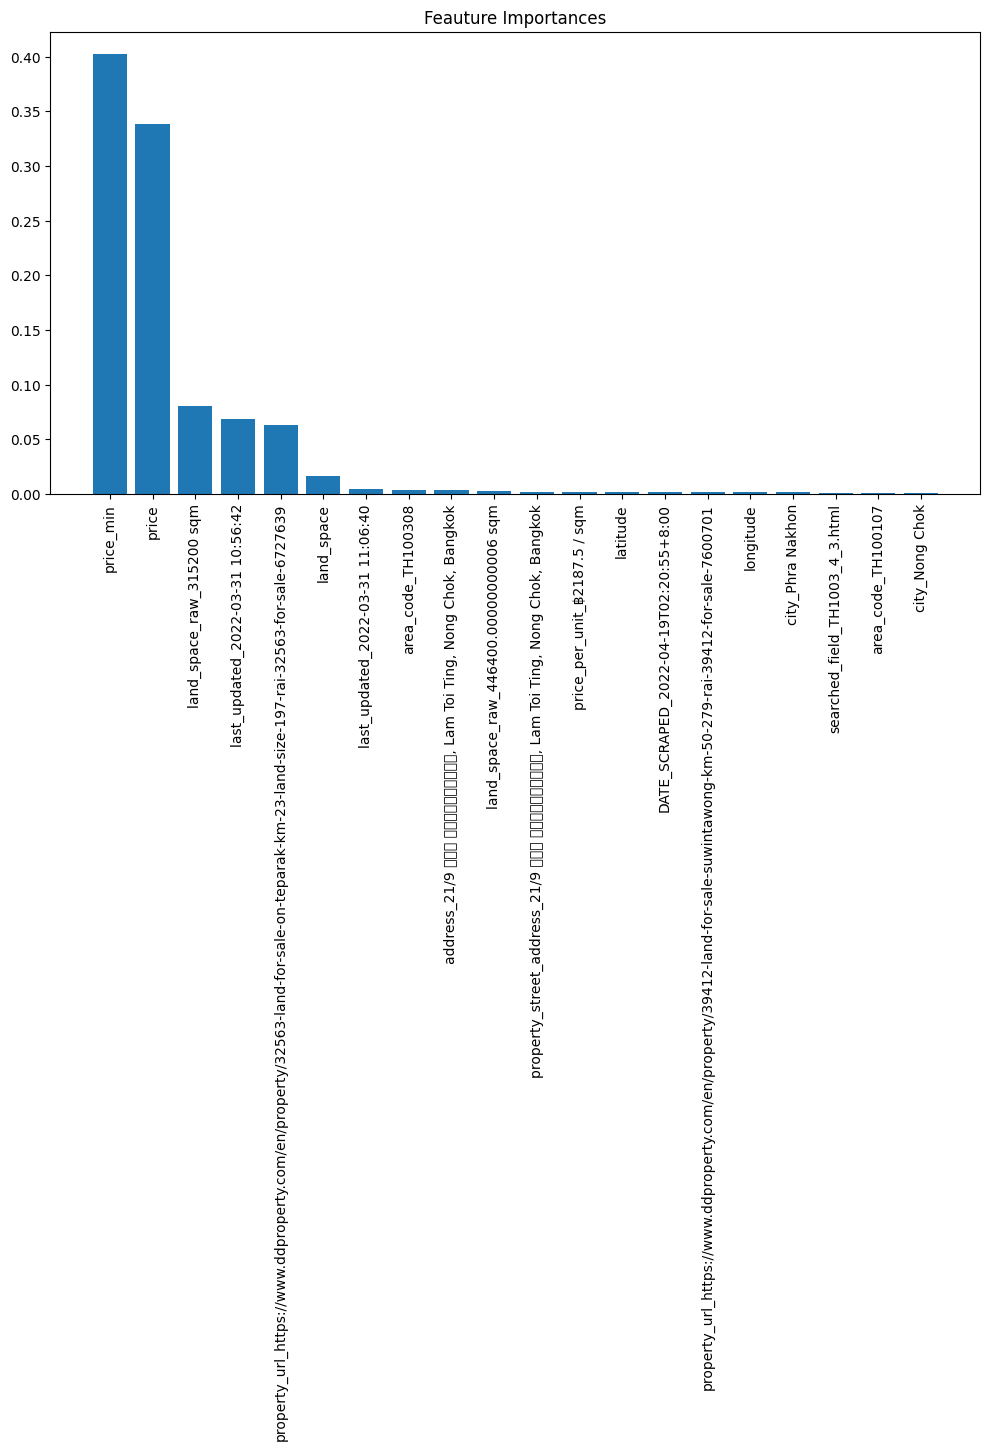

In [12]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('data/ddproperty_2022-04-19.csv', nrows=1000)

df = df.dropna(axis=1, how='all')
#df.info()
#df.head()
df['price_max'] = pd.to_numeric(df['price_max'], errors='coerce')
y = df['price_max']

print(df.columns.tolist())
X = df.drop(columns=['price_max', 'price_raw', 'property_id', 'agent_name','listing_headline'])
#y = df['price']

# change string columne to numerical by one-hot encoder
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(X.mean())

# X = features , y = target (price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build up a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# prediction
y_pred = rf_model.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_name = X.columns

plt.figure(figsize=(12,6))
plt.title("Feauture Importances")
plt.bar(range(20), importances[indices][:20], align="center")
plt.xticks(range(20), [feature_name[i] for i in indices][:20], rotation=90)
plt.tight_layout()
plt.show()